In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [137]:
df = pd.read_csv("shopping_trends_updated.csv")

In [138]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [139]:
df.shape

(3900, 18)

In [140]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [141]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [142]:
df.duplicated().sum()

np.int64(0)

In [143]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Distribution of Male - Female

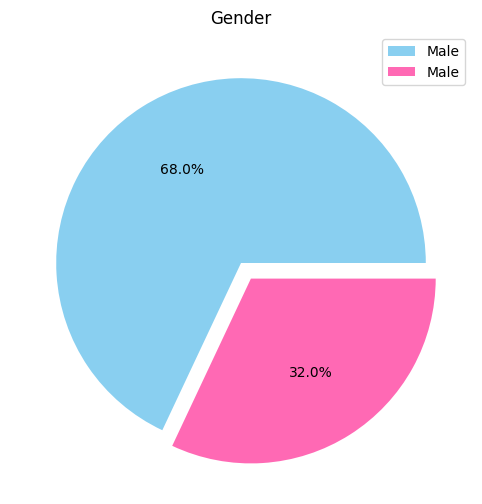

In [144]:
plt.figure(figsize=(8, 6))
explode = (0, 0.1)

plt.pie(df['Gender'].value_counts(), colors = colors, explode = explode, autopct = '%1.1f%%', )
plt.title('Gender')
plt.legend(labels = df['Gender'], loc = "best")
plt.show()

###  Average purchase amount by gender

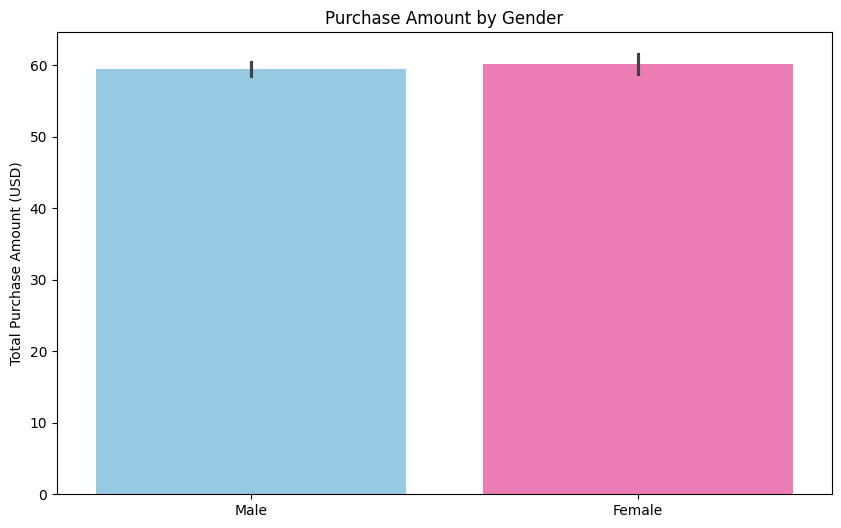

In [295]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df, estimator='mean', palette = colors)

plt.title('Purchase Amount by Gender')
plt.xlabel('')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

### Average purchase amount each gender invests in different categories

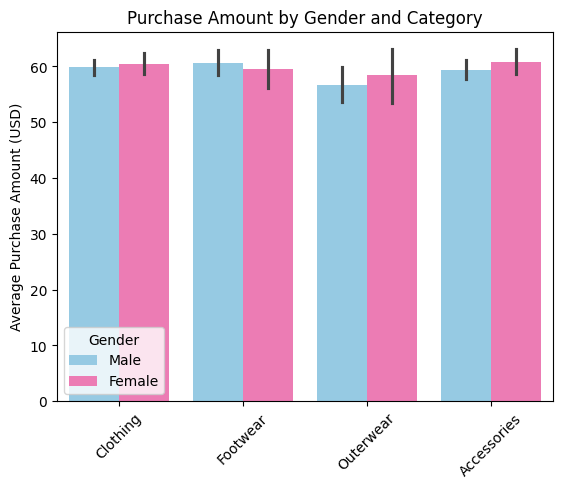

In [296]:
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Gender', data=df, palette=colors)


plt.title('Purchase Amount by Gender and Category')
plt.xlabel('')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)  
plt.legend(title='Gender', loc='best')
plt.show()

In [147]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Average purchase amount or count for each gender and category.

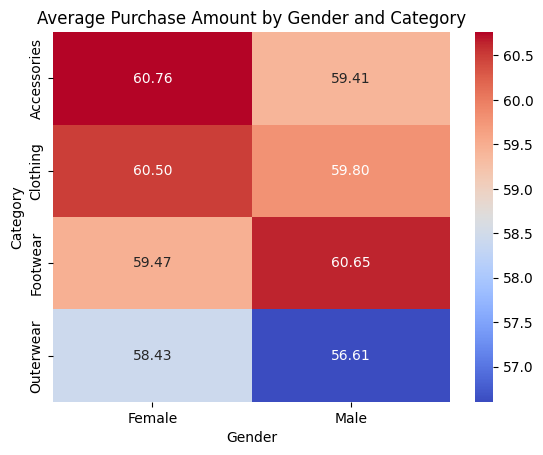

In [148]:
# Pivot table for heatmap
pivot_table = df.pivot_table(index='Category', columns='Gender', values='Purchase Amount (USD)', aggfunc=np.mean)

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Purchase Amount by Gender and Category')
##plt.xlabel('Gender')
##plt.ylabel('Category')
plt.show()

### Average age and average purchase amount by gender

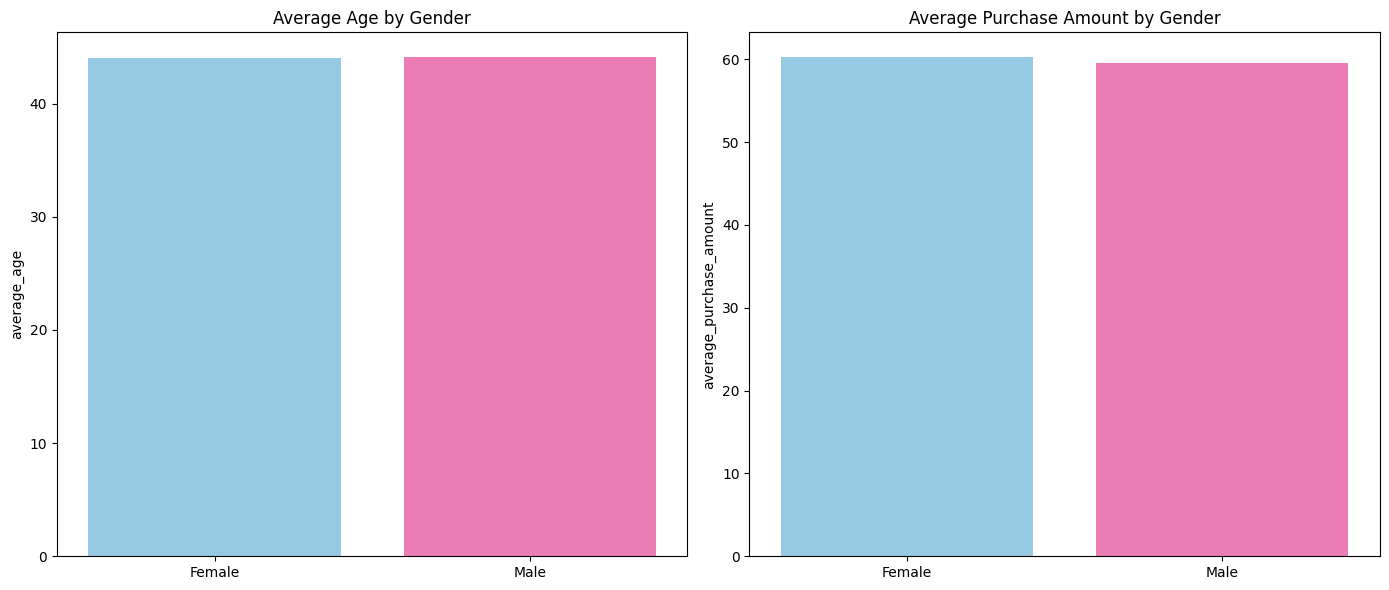

In [149]:
# DataFrame with average age and average purchase amount by gender
summary_df = df.groupby('Gender').agg(
    average_age=('Age', 'mean'),
    average_purchase_amount=('Purchase Amount (USD)', 'mean')
).reset_index()

plt.figure(figsize=(14, 6))

# bar plot with two subplots: one for average age and one for average purchase amount

# Average age
plt.subplot(1, 2, 1)
sns.barplot(x='Gender', y='average_age', data=summary_df, palette= colors)
plt.title('Average Age by Gender')
plt.xlabel('')


# Average purchase amount
plt.subplot(1, 2, 2)
sns.barplot(x='Gender', y='average_purchase_amount', data=summary_df, palette= colors)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('')

plt.tight_layout()
plt.show()

In [150]:
df['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

### Items and their purchase frequency

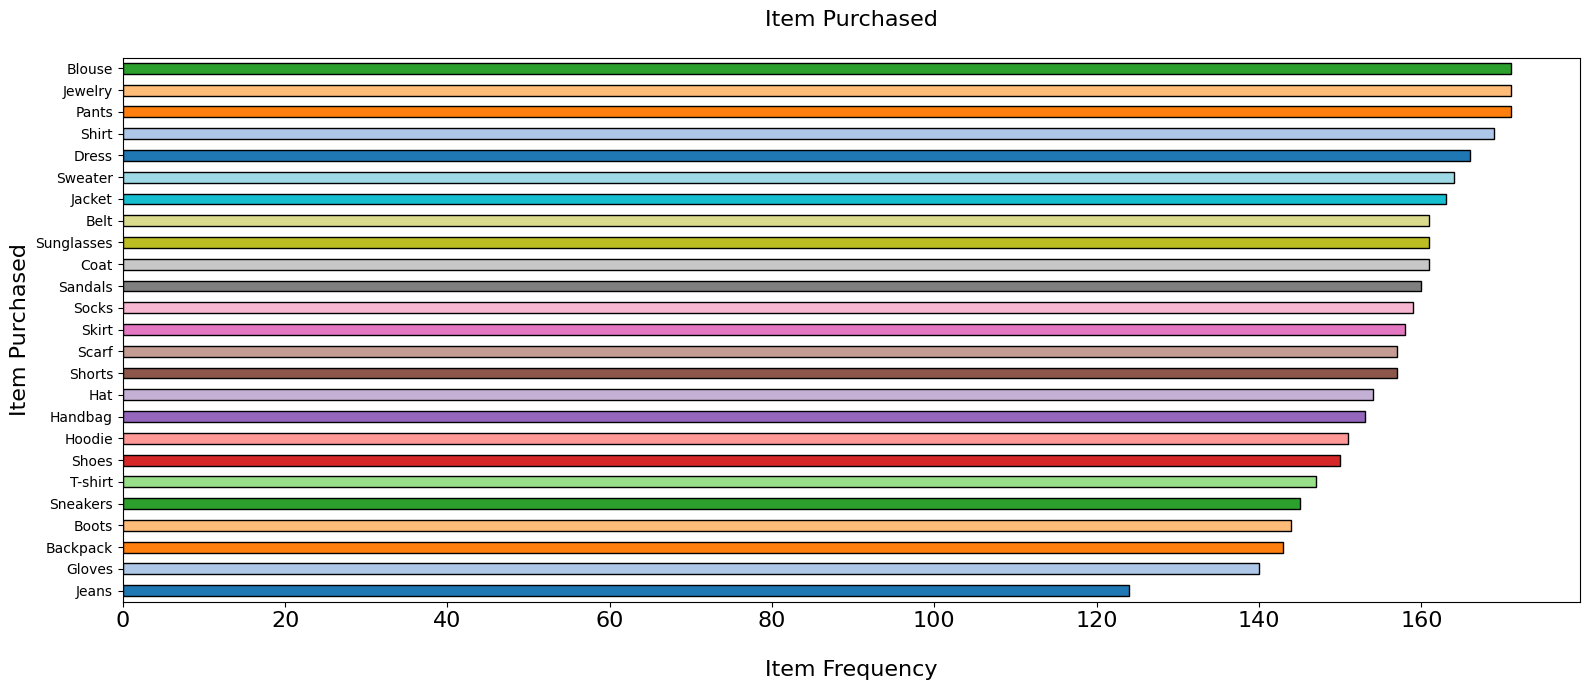

In [151]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nItem Frequency', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [152]:
df['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Utah              71
Wyoming           71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

In [155]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Payment method used by male and female

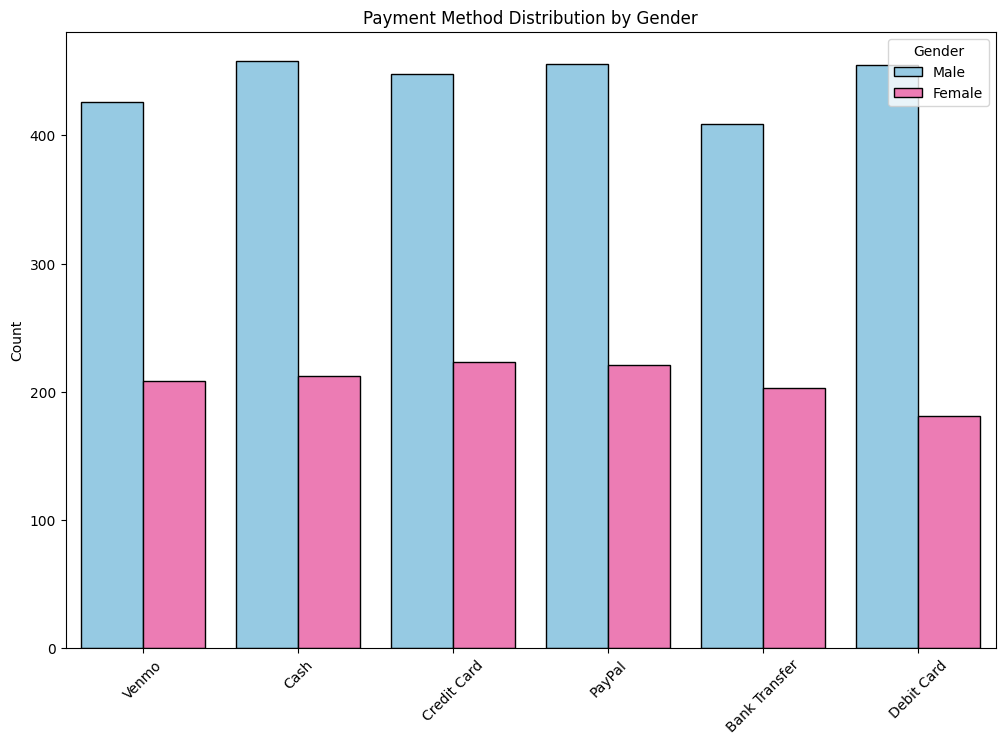

In [158]:
plt.figure(figsize=(12, 8))

# Plotting the count plot
sns.countplot(x='Payment Method', hue='Gender', data=df, palette=colors, edgecolor='black')

# Adding titles and labels
plt.title('Payment Method Distribution by Gender')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

### Average Purchase Amount by Payment Method and Gender

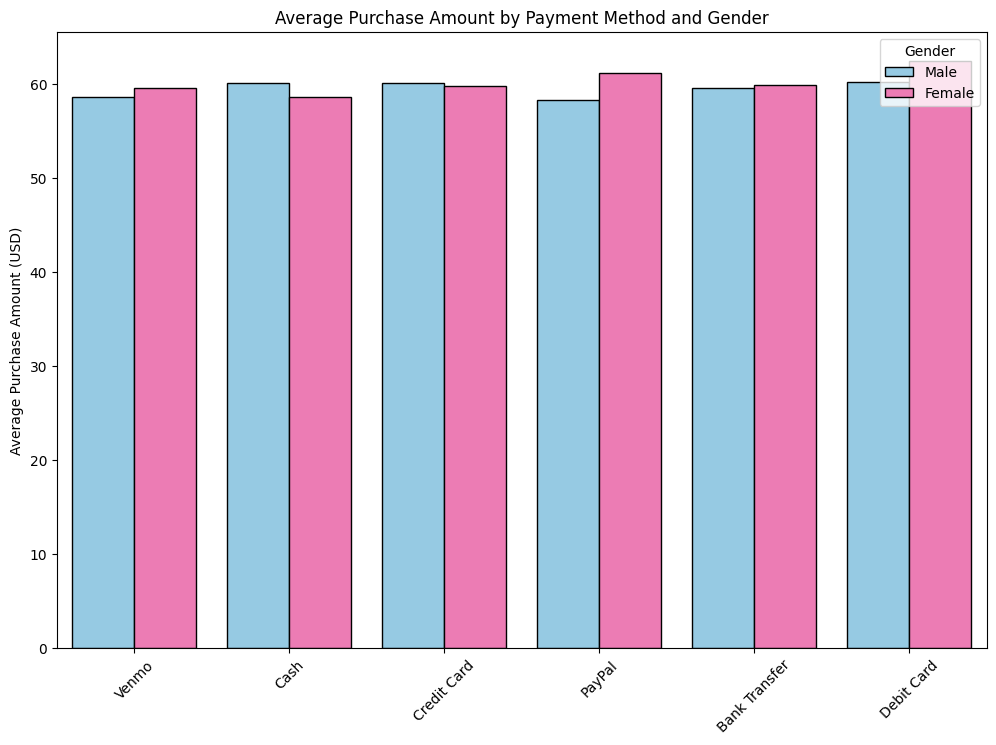

In [166]:
plt.figure(figsize=(12, 8))

# Plotting the bar plot
sns.barplot(x='Payment Method', y='Purchase Amount (USD)', hue='Gender', data=df, estimator='mean', ci=None, palette=colors, edgecolor='black')

# Adding titles and labels
plt.title('Average Purchase Amount by Payment Method and Gender')
plt.xlabel('')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

### Payment method distribution by gender

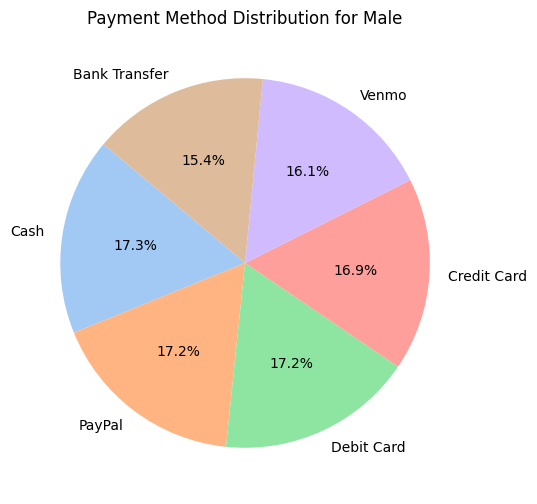

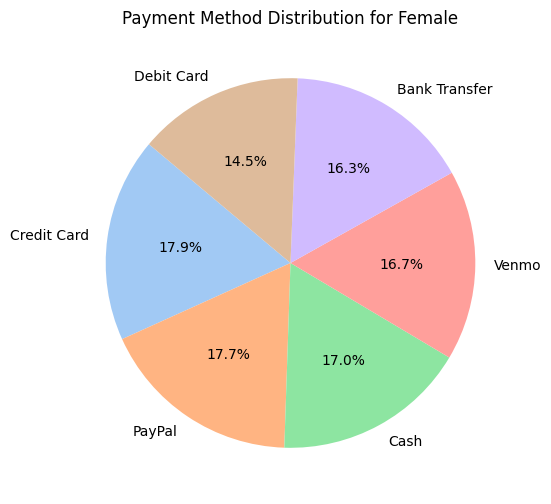

In [179]:
genders = df['Gender'].unique()

for gender in genders:
    plt.figure(figsize=(6, 6))
    gender_df = df[df['Gender'] == gender]
    payment_counts = gender_df['Payment Method'].value_counts()
    plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    plt.title(f'Payment Method Distribution for {gender}')
    plt.show()


In [180]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [207]:
discount_counts = {}

for gender in df['Gender'].unique():
    # Filter the DataFrame for the current gender and count the 'Yes' values in 'Discount Applied'
    count = df[(df['Gender'] == gender) & (df['Discount Applied'] == 'Yes')].shape[0]
    discount_counts[gender] = count

print(discount_counts)

{'Male': 1677, 'Female': 0}


### Discounts applied by male and female

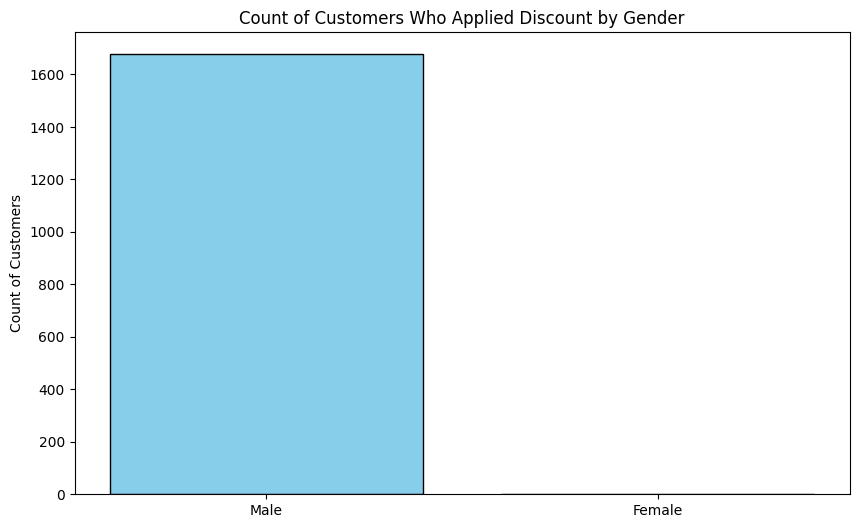

In [209]:
plt.figure(figsize=(10, 6))


plt.bar(discount_counts.keys(), discount_counts.values(), color=['skyblue', 'lightcoral'], edgecolor='black')


plt.title('Count of Customers Who Applied Discount by Gender')
plt.xlabel('')
plt.ylabel('Count of Customers')
plt.xticks(rotation=0)

plt.show()

It is weird that no female has applied any discount for products

### Shipping Type Distribution

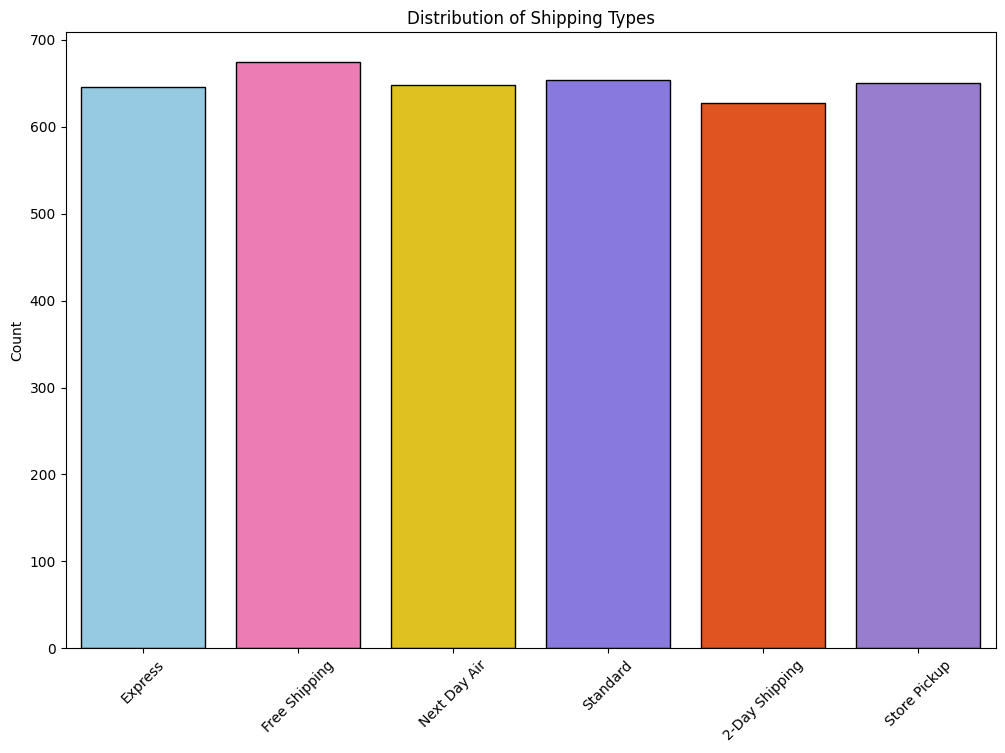

In [246]:
plt.figure(figsize=(12, 8))


sns.countplot(x='Shipping Type', data=df, palette=colors, edgecolor='black')


plt.title('Distribution of Shipping Types')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

### Shipping Type and Discount Applied

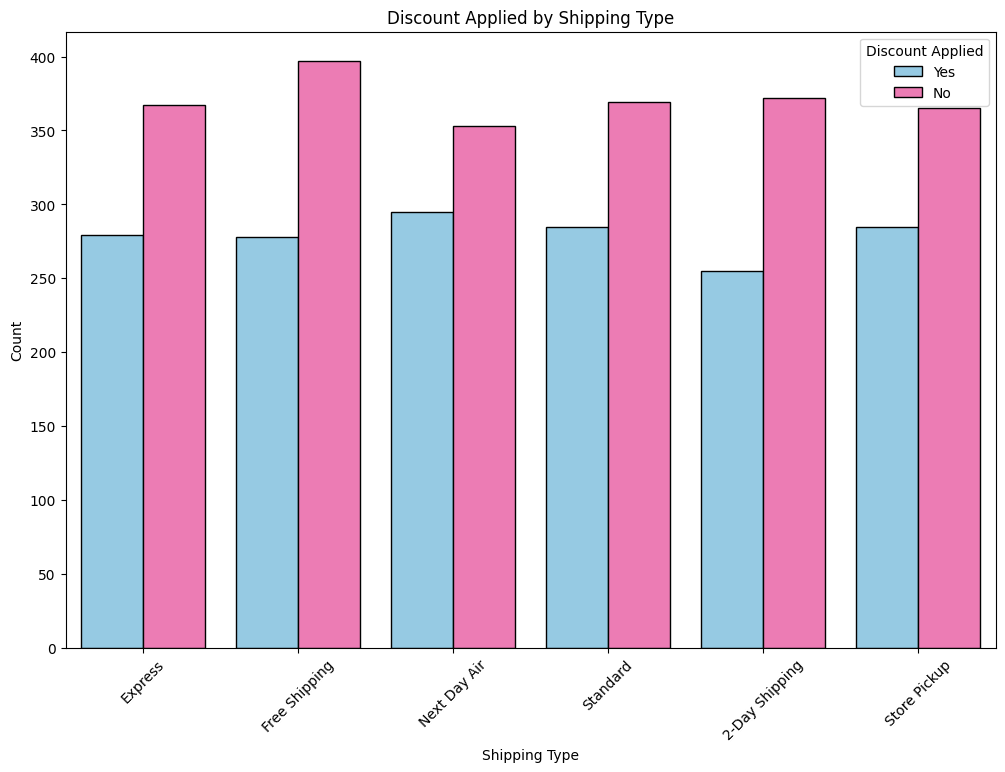

In [268]:

plt.figure(figsize=(12, 8))


sns.countplot(x='Shipping Type', hue='Discount Applied', data=df, palette=colors, edgecolor='black')


plt.title('Discount Applied by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='Discount Applied')
plt.show()


### Average ratings for shipping types

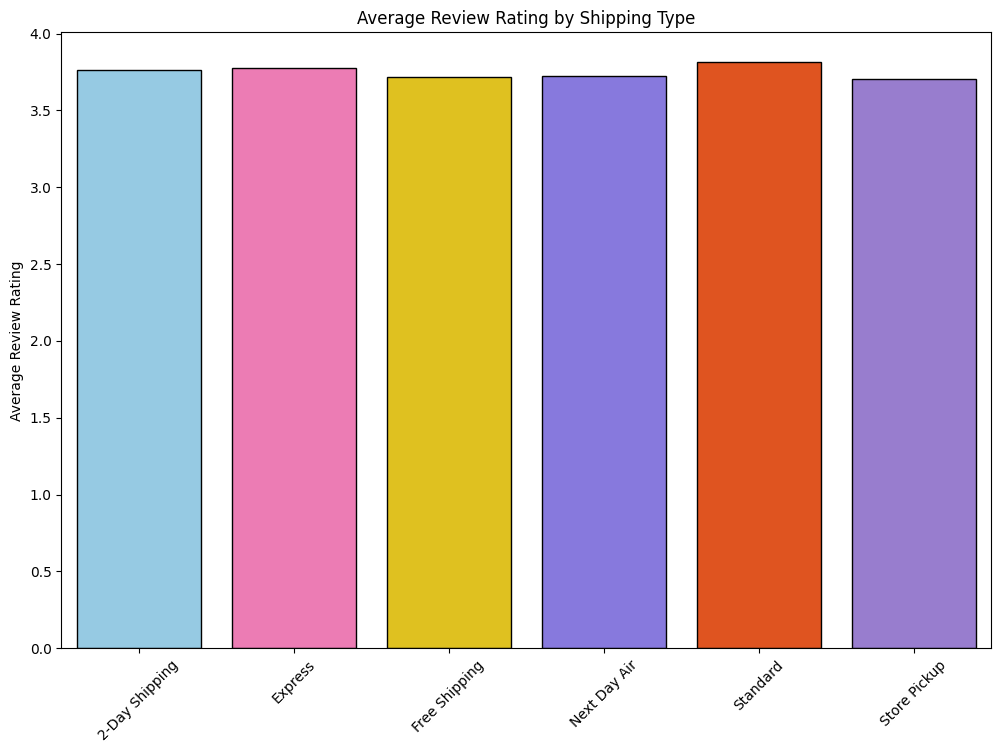

In [271]:
average_review_rating = df.groupby('Shipping Type')['Review Rating'].mean().reset_index()


plt.figure(figsize=(12, 8))


sns.barplot(x='Shipping Type', y='Review Rating', data=average_review_rating, palette=colors, edgecolor='black')


plt.title('Average Review Rating by Shipping Type')
plt.xlabel('')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.show()

### Frequency of puchases 

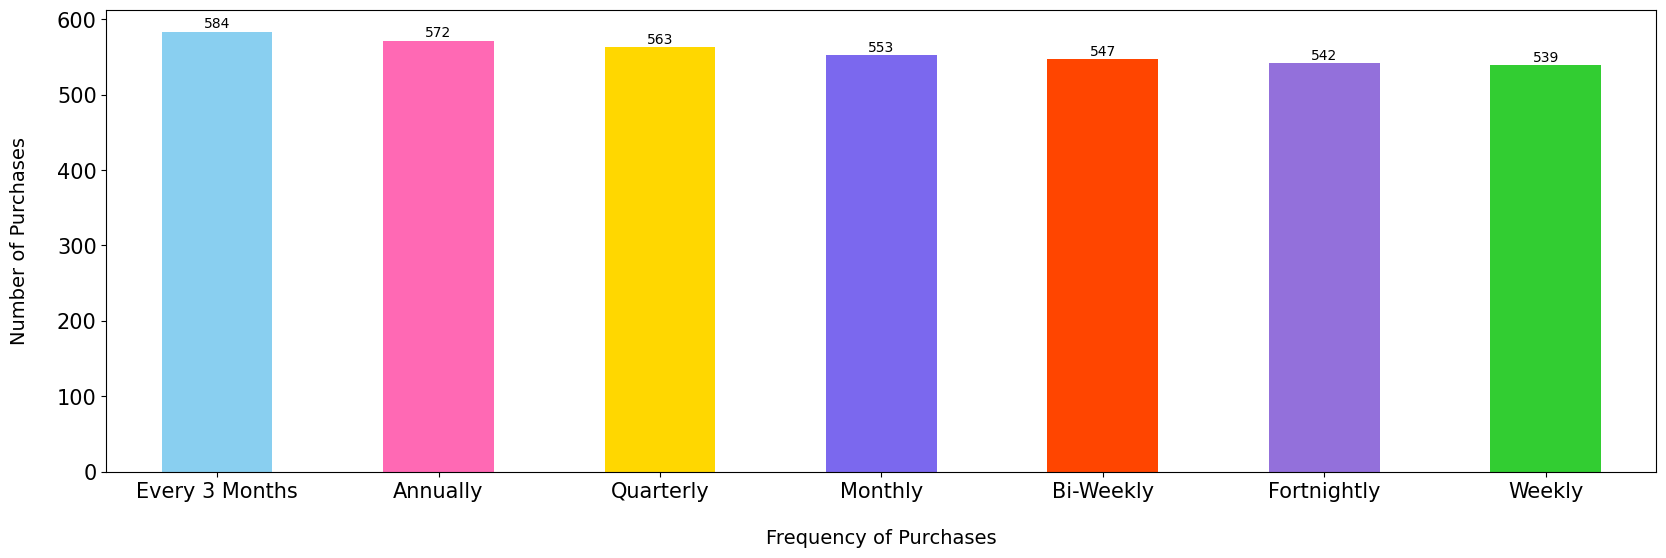

In [280]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases',  fontsize = 14, labelpad = 20)
plt.ylabel('Number of Purchases',  fontsize = 14, labelpad = 20);

In [281]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Promotion code usage distribution

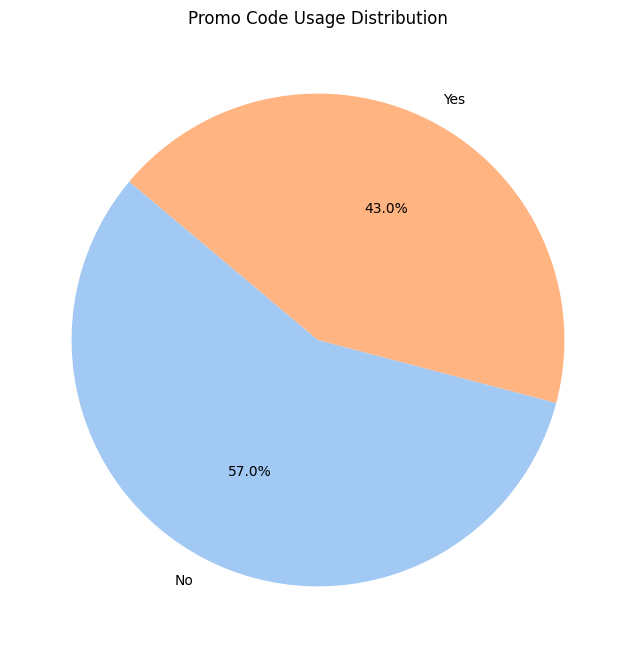

In [293]:
promo_code_usage = df['Promo Code Used'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(promo_code_usage, labels=promo_code_usage.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Promo Code Usage Distribution')
plt.show()

### What is the most common item purchased 

In [297]:
most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


### What is the total purchase amount for each category ?

In [298]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


### What is the average review rating for male customers and female customers separately ?

In [299]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


### What is the most common payment method used by customers ?

In [300]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: PayPal


### How many customers have opted for the Subscription ?

In [301]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


### What is the most common season for purchases ?

In [302]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for purchase:", most_common_season)

Most Common Season for purchase: Spring


### How many customers used a promo code for their purchase ?

In [304]:
customer_promo = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Total customers who used promo code for purchase:", customer_promo)

Total customers who used promo code for purchase: 1677


### What is the maximum and minimum review rating in the dataset ?

In [306]:
max_review = df['Review Rating'].max()
min_review = df['Review Rating'].min()

print("Maximum review rating:", max_review)
print("Minimum review rating:", min_review)

Maximum review rating: 5.0
Minimum review rating: 2.5


### What is the most common shipping type for customers with a review rating above 4 ?

In [316]:
common_shipping_type = df[df['Review Rating']>=4] ['Shipping Type'].mode()[0]
print("Most Common shipping for High Review Ratings:", common_shipping_type)

Most Common shipping for High Review Ratings: Standard


### How many customers have made more than 30 previous purchases ?

In [317]:
customers_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print("Number of Customers with more than 30 Previous Purchases:", customers_above_30_previous_purchases)

Number of Customers with more than 30 Previous Purchases: 1549


### What is the most common payment method for customers who shop in the Winter season ?

In [318]:
common_payment_winter = df[df['Season']=='Winter'] ['Payment Method'].mode()[0]
print("Most Common payment method in winter:", common_payment_winter)

Most Common payment method in winter: PayPal


### What is the most common category of items purchased by female customers

In [333]:
common_item_female = df[df['Gender'] == 'Female']['Category'].mode()[0]
print("Most Common items purchased by females:", common_item_female)

Most Common items purchased by females: Clothing


In [ ]:
### ### What is the most common category of items purchased by male customers

In [335]:
common_item_male = df[df['Gender'] == 'Male']['Category'].mode()[0]
print("Most Common items purchased by males :", common_item_male)

Most Common items purchased by males : Clothing


### What is the total purchase amount for customers in each location ?

In [338]:
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Location:")
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee    

### What is the average purchase amount for each color of items ?

In [339]:
avg_purchase_by_color = df.groupby('Color')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount by Color:")
print(avg_purchase_by_color)

Average Purchase Amount by Color:
Color
Beige        60.414966
Black        58.401198
Blue         56.953947
Brown        59.063830
Charcoal     60.633987
Cyan         61.891566
Gold         61.007246
Gray         62.490566
Green        65.704142
Indigo       56.251701
Lavender     59.129252
Magenta      57.131579
Maroon       59.525316
Olive        58.146893
Orange       60.889610
Peach        59.187919
Pink         60.588235
Purple       60.013245
Red          59.317568
Silver       56.832370
Teal         60.808140
Turquoise    55.613793
Violet       61.716867
White        62.640845
Yellow       59.241379
Name: Purchase Amount (USD), dtype: float64


### What is the total purchase amount for each size of clothing items (XL, L, M, S) 

In [340]:
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Size for Clothing Items:")
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


### What is the total purchase amount for customers who made purchases in the Fall season and used a credit card as the payment method ?

In [341]:
total_purchase_fall_credit_card = df[(df['Season'] == 'Fall') & (df['Payment Method'] == 'Credit Card')]['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method:", total_purchase_fall_credit_card)

Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method: 9905


### What is the most common category of items purchased by male customers?

In [349]:
common_category_high_rating_male = df[(df['Gender'] == 'Male') & (df['Review Rating']==5)]['Category'].mode()[0]
print("Most Common Category for High-Rating Male Customers:", common_category_high_rating_male)

Most Common Category for High-Rating Male Customers: Accessories


### How many customers have a subscription status of 'Yes' and used a promo code for their purchase ?

In [350]:
subscription_promo_count = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("Number of Customers with Subscription and Promo Code Used: ", subscription_promo_count)

Number of Customers with Subscription and Promo Code Used:  1053


### Histogram of Age distribution

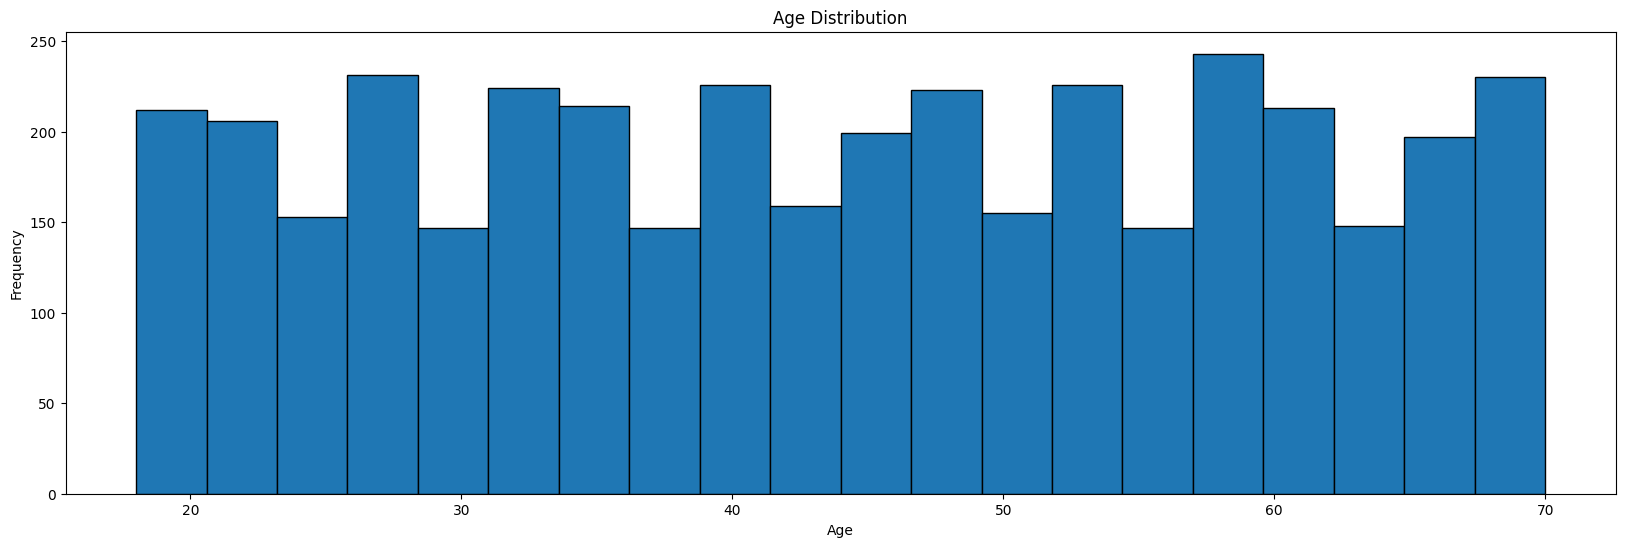

In [352]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Stacked Bar Chart of Subscription Status by Gender

<Figure size 2000x600 with 0 Axes>

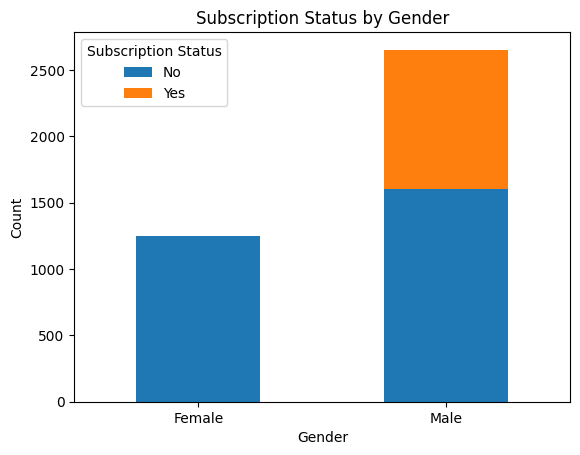

In [353]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

### Bar Plot of Payment Method by Season

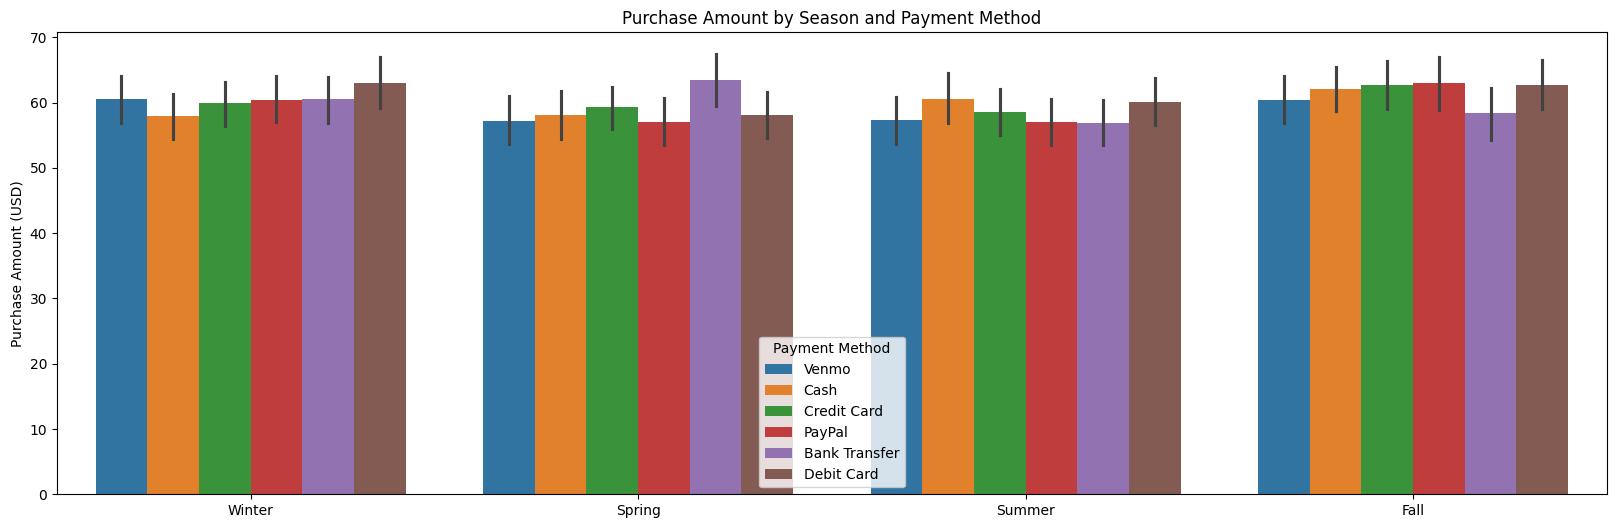

In [355]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()